In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

### Import Data

In [2]:
df = pd.read_csv('kc_house_data.csv')

### EDA - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
df.corr(numeric_only=True) #Korelasyon, Correlation baginti Pearson Correlation Matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
# %20 ile %80 arasındaki corelasyon değerleri alınır
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [10]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [11]:
df['yr_built'].value_counts().to_frame()

,count
yr_built,
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27


In [12]:
df['yr_renovated'].value_counts().to_frame()

,count
yr_renovated,
0,20699
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1


In [13]:
df['bedrooms'].value_counts().to_frame()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


In [14]:
df['condition'].value_counts().to_frame()

,count
condition,
3,14031
4,5679
5,1701
2,172
1,30


### Data Visualization

Domain knowledge (Business bilgisi) olarak Mileage(KM)'ın da Price üzerinde etkisi olduğu biliyoruz. Dolayısıyla onu da modelimize dahil edebiliriz

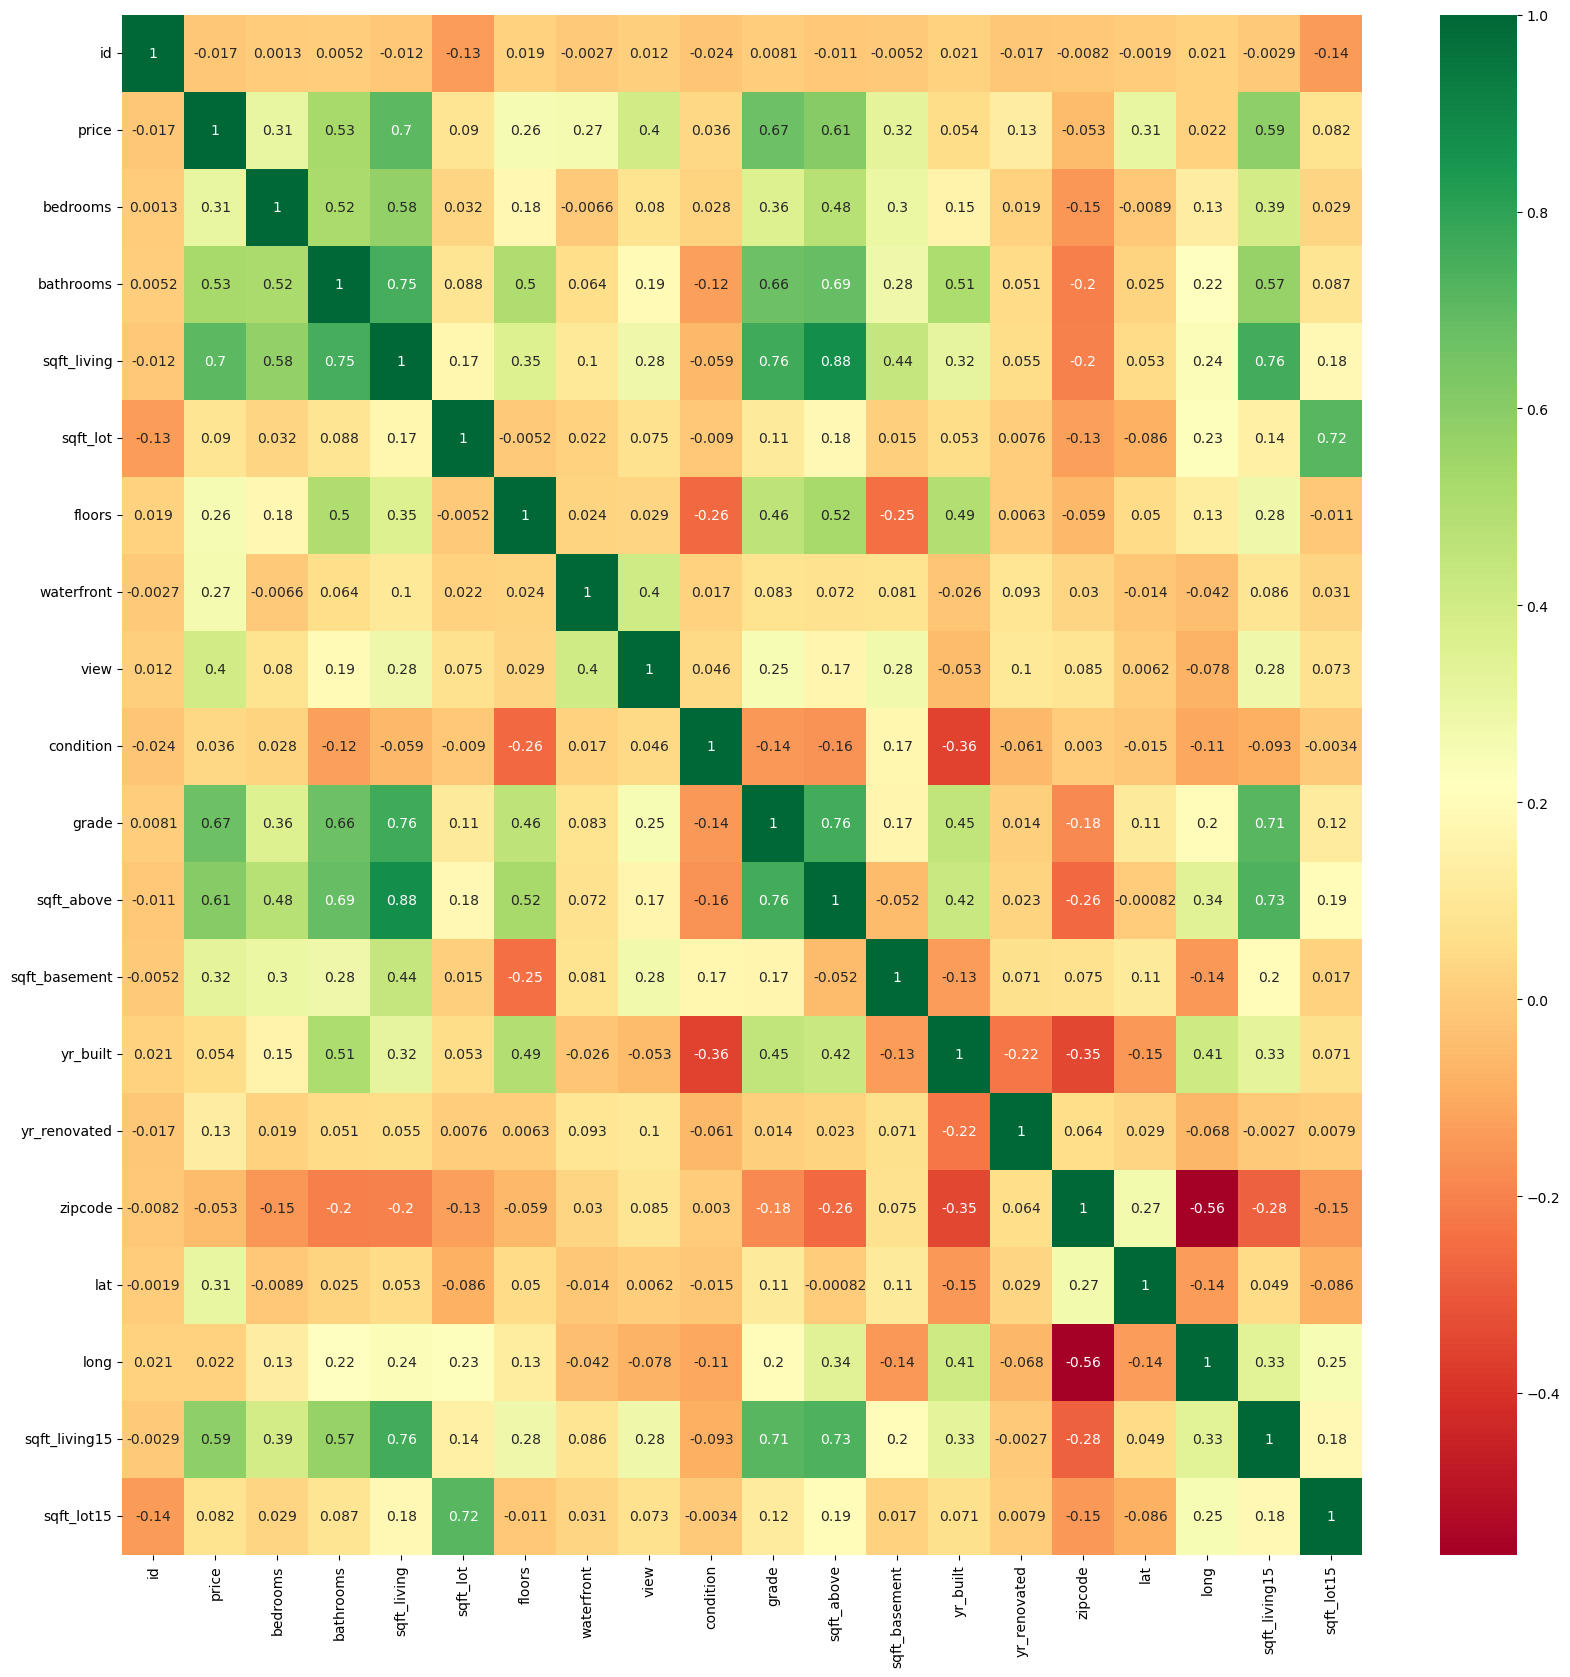

In [15]:
ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(numeric_only=True),annot = True, cmap='RdYlGn');

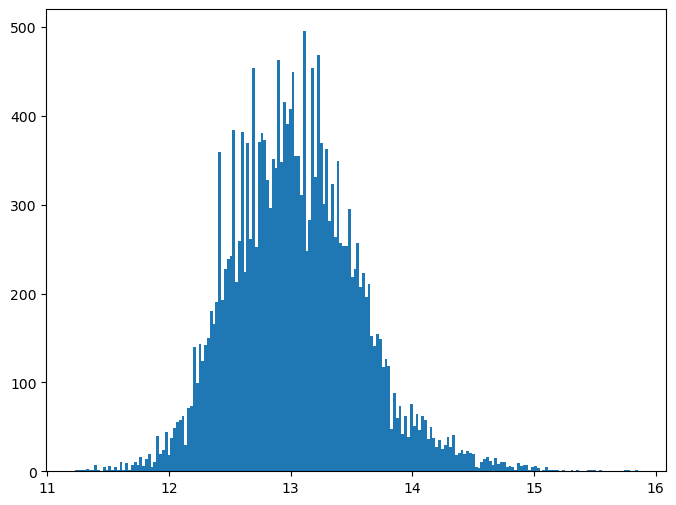

In [16]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.price)), bins=200);

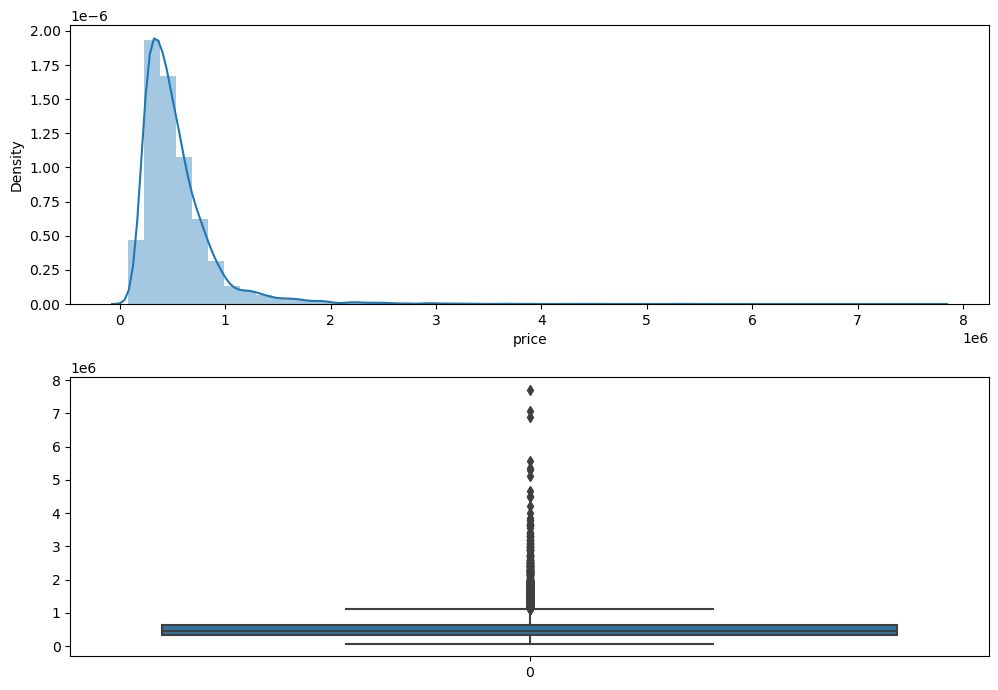

In [17]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout();

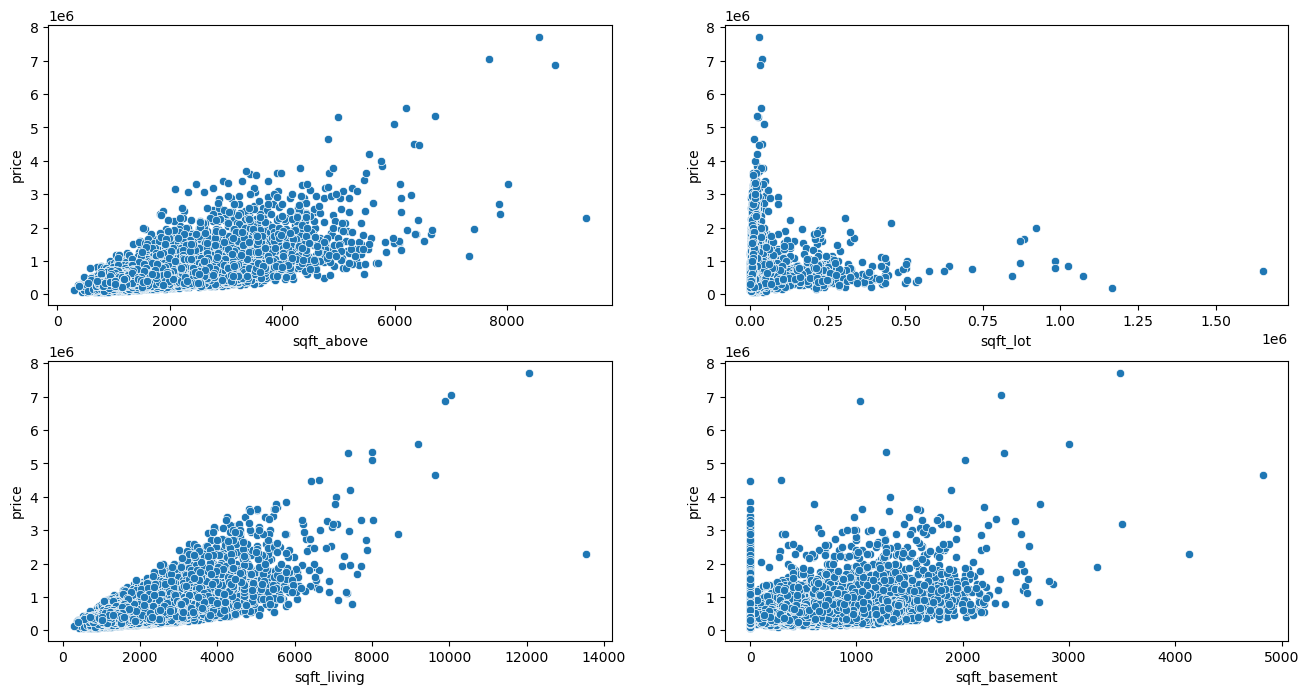

In [18]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(x='sqft_above', y='price', data=df)
fig.add_subplot(2,2,2)
sns.scatterplot(x='sqft_lot', y='price', data=df)
fig.add_subplot(2,2,3)
sns.scatterplot(x='sqft_living',y='price', data=df)
fig.add_subplot(2,2,4)
sns.scatterplot(x='sqft_basement',y='price', data=df);


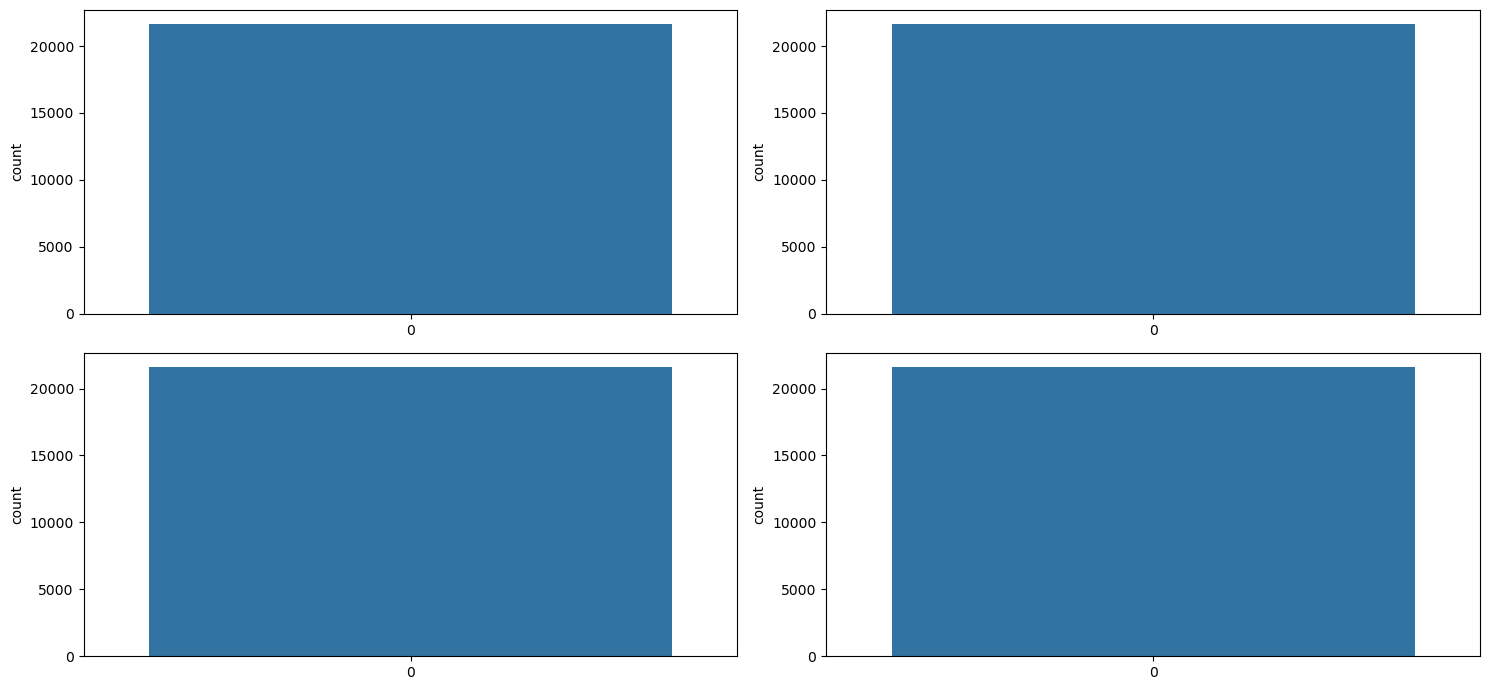

In [19]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])
plt.tight_layout()

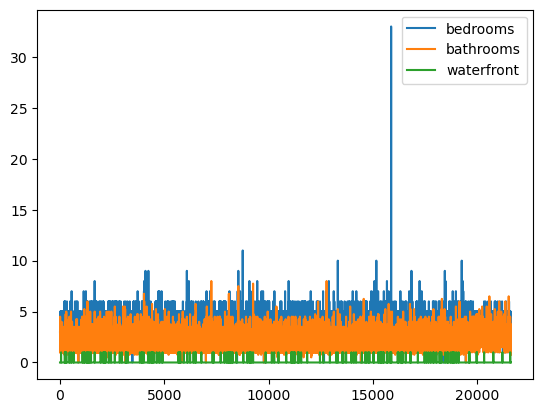

In [20]:
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend();

<Axes: >

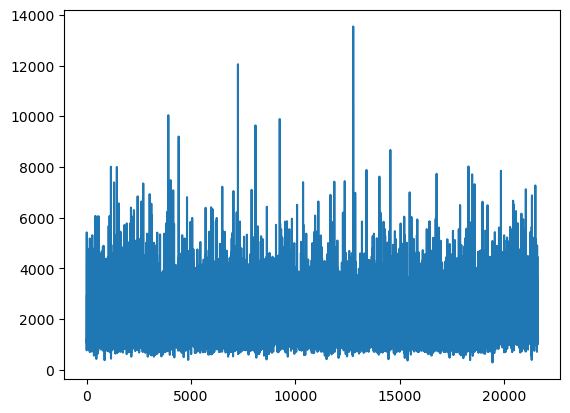

In [21]:
df.sqft_living.plot()

<Axes: >

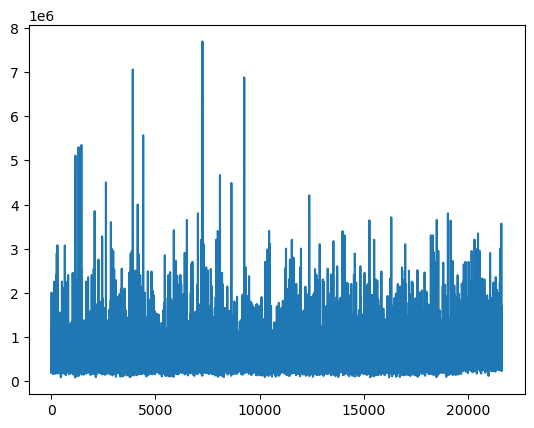

In [22]:
df.price.plot()

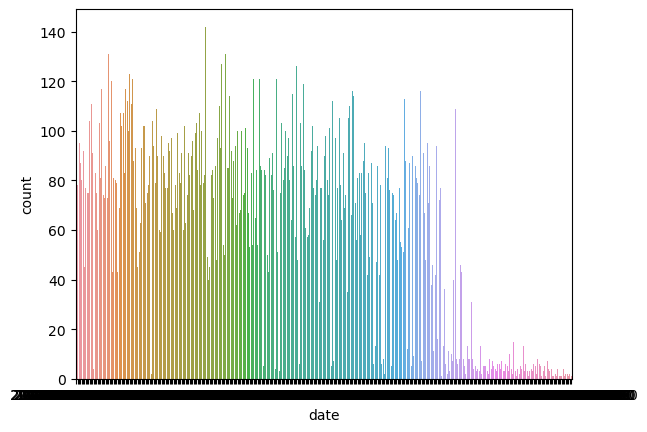

In [23]:
sns.countplot(x=df["date"]);

<Axes: >

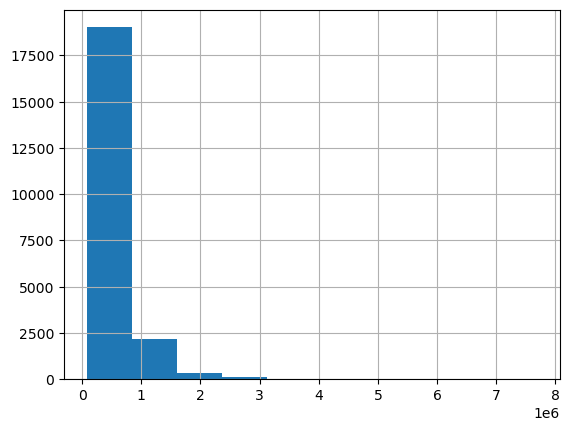

In [24]:
df.price.hist()

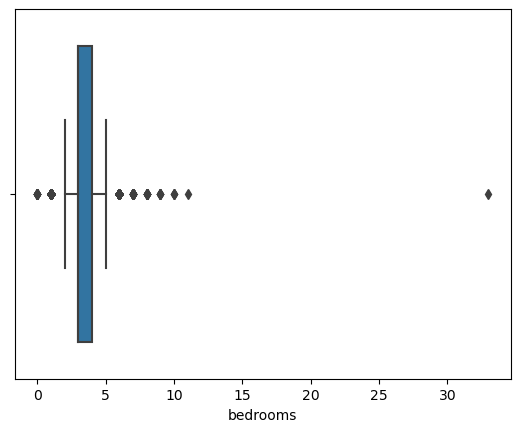

In [25]:
#find outliers with boxplot
sns.boxplot(x=df['bedrooms']);

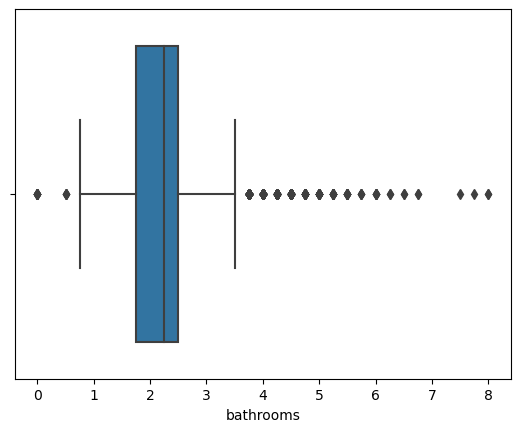

In [26]:
sns.boxplot(x=df['bathrooms']);

<Axes: >

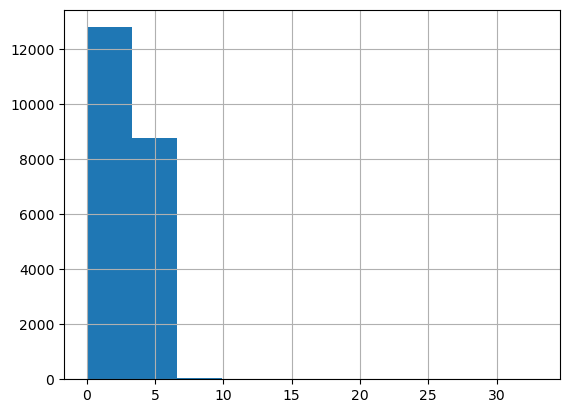

In [27]:
df.bedrooms.hist()

### Feature Engineering

###### Creating new data by making an inference with the data we have (inference art) for example subtracting the age of the building from the building year of construction and turning it into a column and adding it to the data

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
df['zipcode']=df['zipcode'].astype("category")

In [30]:
df=df[df['bedrooms']<10]

In [31]:
df=df[df['bathrooms']<7]

In [32]:
df=df[df['condition']>2]

In [33]:
# df['bedrooms']=df['bedrooms']**2 

In [34]:
# df['bathrooms']=df['bathrooms']**2

In [35]:
# df['condition']=df['condition']**2

In [36]:
import datetime

In [37]:
# df['age']=2022-df['yr_built']
df['age']=datetime.datetime.now().year-df['yr_built']

In [38]:
df['basement']= np.where(df['sqft_basement']>0, 1, 0) # Bodrum deposu var olanlar
df['renovated'] = np.where(df['yr_renovated']>0, 1, 0) # Tadilat yapilmislari getir

In [39]:
# If there is a number greater than 0, make it 1 and the rest 0 
# df['yr_renovated']=np.where(df['yr_renovated']>0,1,0)
# df['sqft_basement']=np.where(df['sqft_basement']>0,1,0)

In [40]:
# df.quantile(.97).astype('int')

In [41]:
# outliers = df.quantile(.97)
# df = df[(df['price']<outliers['price'])]
# df = df[(df['bedrooms']<outliers['bedrooms'])]
# df = df[(df['sqft_above']<outliers['sqft_above'])]
# df = df[(df['condition']<outliers['condition'])]
# df = df[(df['sqft_living']<outliers['sqft_living'])]

In [42]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
count,2.140200e+04,2.140200e+04,21402.000000,21402.000000,21402.000000,2.140200e+04,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000
mean,4.583284e+09,5.413357e+05,3.373096,2.120152,2084.786141,1.494448e+04,1.497313,0.007523,0.234978,3.424073,7.668115,1792.475376,292.310765,1971.241940,84.585646,47.560285,-122.213633,1989.742734,12708.869498,52.758060,0.393421,0.042379
std,2.876445e+09,3.614805e+05,0.898728,0.764603,910.304859,4.050451e+04,0.540500,0.086408,0.766918,0.634915,1.168477,824.251676,441.901931,29.317525,402.106213,0.138715,0.140701,685.584560,27102.235744,29.317525,0.488520,0.201457
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,9.000000,0.000000,0.000000
25%,2.124072e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,27.000000,0.000000,0.000000
50%,3.904970e+09,4.509000e+05,3.000000,2.250000,1920.000000,7.605500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,47.572200,-122.229000,1840.000000,7620.000000,49.000000,0.000000,0.000000
75%,7.312350e+09,6.460000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,1997.000000,0.000000,47.678200,-122.124000,2370.000000,10080.000000,72.000000,1.000000,0.000000
max,9.900000e+09,7.062500e+06,9.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,124.000000,1.000000,1.000000


In [43]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.699059
grade            0.671015
sqft_above       0.600921
sqft_living15    0.588408
bathrooms        0.520426
view             0.396529
sqft_basement    0.319181
bedrooms         0.314474
lat              0.310585
waterfront       0.270050
floors           0.255790
basement         0.179749
yr_renovated     0.125039
renovated        0.124684
sqft_lot         0.093915
sqft_lot15       0.083571
yr_built         0.051829
condition        0.024409
long             0.021456
id               0.020292
age              0.051829
Name: price, dtype: float64

### Modeling

In [44]:
x = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement',
        'bedrooms','lat','waterfront','floors']]
y = df[['price']]

In [45]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0


In [46]:
y.shape

(21402, 1)

In [47]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [48]:
x=pd.get_dummies(x,drop_first=True)

In [49]:
x

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,1530,2.50,0,0,3,47.6993,0,3.0
21609,2310,8,2310,1830,2.50,0,0,4,47.5107,0,2.0
21610,1020,7,1020,1020,0.75,0,0,2,47.5944,0,2.0
21611,1600,8,1600,1410,2.50,0,0,3,47.5345,0,2.0


In [50]:
# pip install xgboost

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
    #Bütün modelleri tanımlıyorum
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()


    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']

    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

    r_squared= []
    rmse= []
    mae= []

    #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**.5)
        mae.append(mean_absolute_error(y_test,p))

    #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable

In [52]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.824419,146357.074646,85548.433704
Gradient Boosting,0.805034,154224.994410,90611.283891
Ridge,0.668243,201180.111737,130261.328124
Lasso,0.668222,201186.451344,130275.457240
Linear,0.668221,201186.746400,130275.894240
Extra Tree,0.600721,220705.412885,121100.830803
Decision Tree,0.581424,225976.011386,121213.156583
ElasticNet,0.569907,229063.747820,152459.591973
KNeighborsRegressor,0.462117,256164.486467,166591.636113


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [54]:
# Linear Regression

In [55]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)

In [56]:
y_pretest = regmodel.predict(x_test)

In [57]:
(mean_squared_error(y_test,y_pretest))**0.5

201186.7464003224

In [58]:
r2_score(y_test,y_pretest)

0.6682210302947456

In [59]:
# Ridge Regression

In [60]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test) 

In [61]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

201180.1117371908

In [62]:
r2_score(y_test,y_pred_ridge)

0.6682429125055933

In [63]:
# Lasso Regression

In [64]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([492255.36388817, 609298.56439949, 419823.66763692, ...,
       381533.16663375, 336578.11619668, 826722.23812793])

In [65]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

201186.45134417043

In [66]:
r2_score(y_test,y_pred_lasso)

0.6682220034538234

In [67]:
# Elastic Net Regression

In [68]:
E = ElasticNet(l1_ratio = .8)

In [69]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [70]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

223852.58093923551

In [71]:
r2_score(y_test,y_pred_elastic)

0.589253064766172

In [72]:
# ExtraTree Regression

In [73]:
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test) 

In [74]:
(mean_squared_error(y_test,y_pred_etr))**0.5

213894.47960660912

In [75]:
r2_score(y_test,y_pred_etr)

0.6249844537997401

In [76]:
#GradientBoosting Regression

In [77]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [78]:
y_pred_gbr = GBR.predict(x_test)

In [79]:
(mean_squared_error(y_test,y_pred_gbr))**0.5  

154230.26198603844

In [80]:
r2_score(y_test,y_pred_gbr)

0.8050203384215867

In [81]:
#K- Neighbors ## Estimates prices by looking at neighbors' house prices by location

In [82]:
from sklearn.neighbors import KNeighborsRegressor 

In [83]:
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [84]:
y_pred_knb = model.predict(x_test)

In [85]:
y_pred_knb

array([[466295.],
       [552670.],
       [389385.],
       ...,
       [413095.],
       [303925.],
       [643500.]])

In [86]:
(mean_squared_error(y_test,y_pred_knb))**0.5  

243566.99147424597

In [87]:
r2_score(y_test,y_pred_knb)

0.5137193559807499

In [88]:
#XGBR Regression

In [89]:
XGBC=XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [90]:
y_pred_xgb=model.predict(x_test)

In [91]:
(mean_squared_error(y_test,y_pred_xgb))**0.5

146357.07464623422

In [92]:
r2_score(y_test,y_pred_xgb)

0.824418982976397

### Feature Importance

In [93]:
# Coefficients - Katsayilar

In [94]:
R.coef_

array([[ 1.27902714e+02,  8.46484539e+04,  6.33286057e+01,
         7.01031312e+00, -5.28663955e+03,  6.56013631e+04,
         6.45702793e+01, -2.69064050e+04,  6.68391471e+05,
         6.11946538e+05, -2.90512400e+04]])

In [95]:
feature_importence=pd.DataFrame({'Feature': x_train.columns, 'Coefs': R.coef_[0]})

In [96]:
feature_importence=feature_importence.sort_values(by='Coefs', ascending=False)

In [97]:
feature_importence

,Feature,Coefs
8,lat,668391.470789
9,waterfront,611946.537728
1,grade,84648.453889
5,view,65601.363082
0,sqft_living,127.902714
6,sqft_basement,64.570279
2,sqft_above,63.328606
3,sqft_living15,7.010313
4,bathrooms,-5286.639554
7,bedrooms,-26906.404985


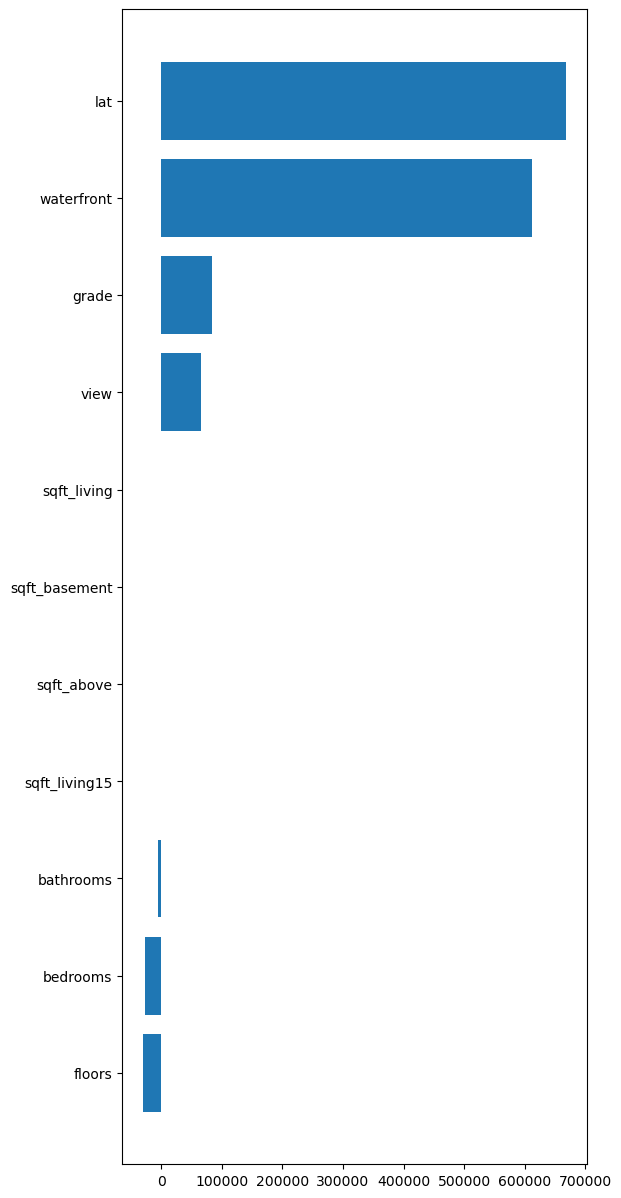

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,15))
plt.barh(feature_importence['Feature'],feature_importence['Coefs'])
plt.gca().invert_yaxis()

In [99]:
# What you need to know about success rates in regression
# R2 score >0.85
# Twilight RMSE
# Residuals should follow a normal distribution

In [100]:
residuals = y_test - y_pred_ridge

In [101]:
residuals

,price
10880,164039.162916
21439,29608.661159
11347,115171.275290
8372,-63083.865345
12833,-204667.676416
...,...
5203,6077.635305
7993,-97698.329311
2973,-162136.674763
9536,73499.114262


<Axes: ylabel='Count'>

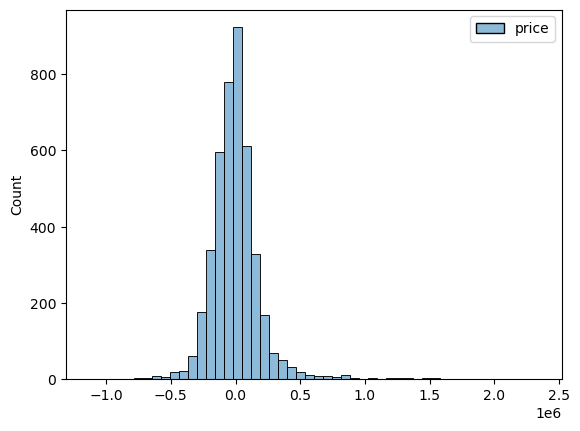

In [102]:
sns.histplot(residuals, bins=50)